# Introduction

Textual data is so rich in semantics and grammatical rules. Vectorizing texts while encoding all this information and knowledge is not straightforward. Up until now, embeddings have been the most convenient way to vectorize texts. <br>
Text embeddings are a dictionary with the keys being the words and the values being the vectors representing these words. In other words, to vectorize a phrase with three words, we fetch each word's vector from the embedding dictionary and either sum/average/concatenate/etc., these vectors.  

## Objective
This notebook aims to guide you through training your embeddings. <br>
While pre-trained embeddings are more available nowadays, they do not always fit the problem we have at hand. <br>
Medical textual data differs from Twitter conversations, google reviews, etc.,. Thus, we need to train our own embeddings to learn the contextual semantics of our dataset.

## Tasks
This notebook contains code you simply need to run and code cells you need to fill in. <br>
No code from your side is required in code blocks where you see the mention *run only*. <br>
When you see the mention *code*, a chunk of code is required from your side. <br>
When you see the mention *comment*, you will need to write a comment/an explication/ an analysis about the subject at hand. 

# 1. Load Wikipedia Corpus (*run only*)

In [2]:
from gensim.test.utils import datapath, get_tmpfile
from gensim.corpora import WikiCorpus
path_to_wiki_dump = datapath("enwiki-latest-pages-articles1.xml-p000000010p000030302-shortened.bz2")
corpus_path = get_tmpfile("wiki-corpus.mm")
wiki = WikiCorpus(path_to_wiki_dump)
sentences = list(wiki.get_texts())

D:\anaconda\lib\site-packages\gensim\utils.py:1332: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected %s; aliasing chunkize to chunkize_serial" % entity)


# 2. Word2vec skipgram - dimension of the word vectors = 50
## 2.1 Train word2vec with skipgram(*code*)

https://radimrehurek.com/gensim/models/word2vec.html

In [3]:
sentences

[['anarchism',
  'is',
  'political',
  'philosophy',
  'that',
  'advocates',
  'self',
  'governed',
  'societies',
  'based',
  'on',
  'voluntary',
  'institutions',
  'these',
  'are',
  'often',
  'described',
  'as',
  'stateless',
  'societies',
  'although',
  'several',
  'authors',
  'have',
  'defined',
  'them',
  'more',
  'specifically',
  'as',
  'institutions',
  'based',
  'on',
  'non',
  'hierarchical',
  'free',
  'associations',
  'anarchism',
  'considers',
  'the',
  'state',
  'to',
  'be',
  'undesirable',
  'unnecessary',
  'and',
  'harmful',
  'while',
  'anti',
  'statism',
  'is',
  'central',
  'anarchism',
  'entails',
  'opposing',
  'authority',
  'or',
  'hierarchical',
  'organisation',
  'in',
  'the',
  'conduct',
  'of',
  'all',
  'human',
  'relations',
  'including',
  'but',
  'not',
  'limited',
  'to',
  'the',
  'state',
  'system',
  'anarchism',
  'draws',
  'on',
  'many',
  'currents',
  'of',
  'thought',
  'and',
  'strategy',
  'ana

In [4]:
from gensim.models import Word2Vec

In [48]:
model = Word2Vec(sentences=sentences, vector_size=50, min_count=6,sg=1) #min_count=5,workers = 4,window=5

## 2.2 Print the first 20 words in the vocabulary (*code*)

In [6]:
print('First 20 words:',model.wv.index_to_key[:20])

First 20 words: ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 2.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [49]:
print("Embeddings of 'education' with 50 as Embedding Dimension")
print(model.wv['education'])
print("Embeddings of 'algorithm' with 50 as Embedding Dimension")
print(model.wv['algorithm'])

Embeddings of 'education' with 50 as Embedding Dimension
[-7.65293896e-01 -1.20548271e-01  4.17205334e-01  4.17982608e-01
 -5.54361522e-01 -1.06052116e-01  6.70892954e-01  6.16662085e-01
  8.73422995e-02 -1.83650255e-01 -3.62359107e-01  3.06211948e-01
 -2.10951000e-01 -2.40145400e-01 -3.44279110e-01  3.21515530e-01
  2.88604856e-01  2.10778460e-01 -7.02840149e-01 -3.86936635e-01
 -6.83495328e-02 -1.58302367e-01  3.81661832e-01  1.45923659e-01
  4.76737320e-01  8.46415013e-02 -2.94668972e-01  3.10304254e-01
 -2.51956046e-01 -7.43126452e-01 -3.53113919e-01 -9.00140585e-05
  2.63647884e-01 -1.61172241e-01  1.73235208e-01  1.18727997e-01
  4.95766997e-01  3.33993196e-01 -2.30096608e-01  2.80897081e-01
  3.06213617e-01  9.99109074e-02 -3.70101891e-02  1.89778328e-01
  9.61004272e-02 -3.03836793e-01 -4.62751761e-02 -1.21770337e-01
 -5.09389350e-03  3.81117761e-01]
Embeddings of 'algorithm' with 50 as Embedding Dimension
[-0.47355062  0.4119861   0.20296219 -0.56687635 -0.3996447  -0.6401027


## 2.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [50]:
for i in ['algorithm','latin','age','death']:
    print('Similarity between education and', i, ':', model.wv.similarity('education', i))

print('Similarity between spanish and latin:', model.wv.similarity('spanish', 'latin'))

Similarity between education and algorithm : 0.21241686
Similarity between education and latin : 0.17714414
Similarity between education and age : 0.42595187
Similarity between education and death : 0.26300007
Similarity between spanish and latin: 0.60245997


## 2.5 Save the embeddings (*code*)

In [51]:
model.save("word2vec.model_S")

# 3. Word2vec cbow - dimension of the word vectors = 50
## 3.1 Train word2vec with cbow(*code*)

In [100]:
model_c = Word2Vec(sentences=sentences, vector_size=50,min_count=6, sg=0)

## 3.2 Print the first 20 words in the vocabulary (*code*)

In [101]:
print('First 20 words:',model_c.wv.index_to_key[:20])

First 20 words: ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that', 'with', 'was', 'on', 'are', 'from', 'an', 'or', 'it', 'at', 'be']


## 3.3 Print the embeddings vector for the words "education" and "algorithm" (*code*)

In [102]:
print("Embeddings of 'education' with 50 as Embedding Dimension")
print(model_c.wv['education'])

Embeddings of 'education' with 50 as Embedding Dimension
[-0.6865189  -0.279232    0.5116706   0.10013282 -0.6009236  -0.15486111
  1.0951799   0.64314264 -0.27619672 -0.14195721 -0.05040789 -0.14371152
 -0.19677773  0.17060956 -0.6717132   0.4058076   0.453485   -0.06490938
 -0.8253917  -0.57340026  0.19729465 -0.05985143  0.30390888 -0.07936275
  0.3425025   0.14337516  0.10782526  0.27691564 -0.70927846 -0.08218853
  0.16582698 -0.50157446  0.75698745 -0.28547    -0.2915579   0.47460392
  0.2972053   0.05416261 -0.4352889  -0.24971788  0.8546311  -0.21195307
 -0.14871038  0.11130467  0.5476986   0.02763204 -0.08929423 -0.28572857
 -0.13556671  0.790651  ]


In [103]:
print("Embeddings of 'algorithm' with 50 as Embedding Dimension")
print(model_c.wv['algorithm'])

Embeddings of 'algorithm' with 50 as Embedding Dimension
[-0.63882273  0.23456687  0.47607037 -0.3785237  -0.32070348 -0.30651182
  0.41016978  0.45343292 -0.46864146  0.0591801  -0.3566855  -0.21539989
  0.39797106  0.14044353 -0.5577712   0.29161522  0.8184182   0.31699127
 -1.4773688  -0.5900681  -0.03885882  0.4782478   0.24836688 -0.18878543
 -0.05431541 -0.17244317  0.15717298 -0.21697144 -0.39829296  0.27642176
  0.1465936  -1.038883    0.5599169  -0.08536942 -0.5599865   0.4494858
  0.16681613 -0.14856833 -0.639059   -0.10267747  1.1654457  -0.11600311
  0.58651674  0.7121994   0.9547646   0.07564474 -0.26141053 -0.00665332
  0.03092995  0.61670536]


## 3.4 Print the similarity between the words (*code*):
- "education" and "algorithm"
- "education" and "latin"
- "education" and "age"
- "education" and "death"
- "spanish" and "latin"

In [104]:
for i in ['algorithm','latin','age','death']:
    print('Similarity between education and', i, ':', model_c.wv.similarity('education', i))

print('Similarity between spanish and latin:', model_c.wv.similarity('spanish', 'latin'))

Similarity between education and algorithm : 0.75911635
Similarity between education and latin : 0.9392607
Similarity between education and age : 0.89112055
Similarity between education and death : 0.8865988
Similarity between spanish and latin: 0.9223292


## 3.5 Save the embeddings (*code*)

In [105]:
model_c.save("word2vec.model_C")

# 4. Visualizing Embeddings
## 4.1 SkipGram Model
### 4.1.1 Set the variable *model* to the skipgram word2vec model trained and saved in section 2 (*code*)

In [58]:
model = Word2Vec.load("word2vec.model_S")

### 4.1.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [59]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])

stopwords = set(stopwords.words('english'))
words_vocab_without_sw = [w for w in words_vocab if not w in stopwords]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 7830
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 7710
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### 4.1.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the Skipgram model (*run only*)

#### Hyperparameters of TSNE

1. n_components: the dimension of the value space.
2. perplexity: the number of neighbours.
3. n_iter: the maximum number of iterations for the optimization.
4. init: the embedding's initialization.

t-SNE requires good amount of hyperparameter tuning to give effective results.  <br>
References: <br>
- [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). 
- [Article](https://distill.pub/2016/misread-tsne/)

In [18]:
from sklearn.manifold import TSNE
import numpy as np, matplotlib.pyplot as plt, matplotlib.cm as cm
%matplotlib inline 
def cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie']):
    embedding_clusters = []
    word_clusters = []

    for word in cluster_key_words:
        embeddings_of_words_similar_to_key_word = []
        words_similar_to_key_word = []
        for similar_word, _ in model.wv.most_similar(word, topn=30):
            words_similar_to_key_word.append(similar_word)
            embeddings_of_words_similar_to_key_word.append(model.wv[similar_word])
        embedding_clusters.append(embeddings_of_words_similar_to_key_word)
        word_clusters.append(words_similar_to_key_word)

    print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word
    print("we have {} clusters".format(len(word_clusters)))
    print("Word in Cluster 1 of EDUCATION :",word_clusters[0])
    embedding_clusters = np.array(embedding_clusters)
    n, m, k = embedding_clusters.shape #geting the dimensions
    tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
    embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2) #reshaping it into 2d so we can visualize it
    return  embeddings_en_2d, word_clusters

def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()

Embedding clusters: [-0.4888195   0.02730188  0.33444247  0.24435939 -0.41554335 -0.11535298
  0.62170637  0.68390113  0.1431006  -0.25057605 -0.36706248  0.17850685
 -0.06915789 -0.0720094  -0.42453158  0.1973205   0.09790281  0.02243479
 -0.6424427  -0.47775844 -0.05650963 -0.02951557  0.4430005   0.29028022
  0.41771695 -0.00407964 -0.29559928  0.40627867 -0.3216761  -0.45809987
 -0.21487232  0.15709274  0.20913613 -0.16569985  0.07691529 -0.16860501
  0.3654202   0.14919123 -0.32919163  0.20044047  0.31027797 -0.02938252
 -0.198969    0.01819037  0.1520903  -0.4077458   0.15438099 -0.08349309
  0.118144    0.33539665]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['public', 'private', 'organization', 'institutions', 'health', 'fund', 'services', 'universities', 'policy', 'colleges', 'report', 'security', 'secondary', 'research', 'membership', 'charter', 'revenue', 'issues', 'bureau', 'department', 'investment', 'organizations', 'funded', 'schools', 'boards', 'ministry', 'fina

C:\Users\yin\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\yin\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


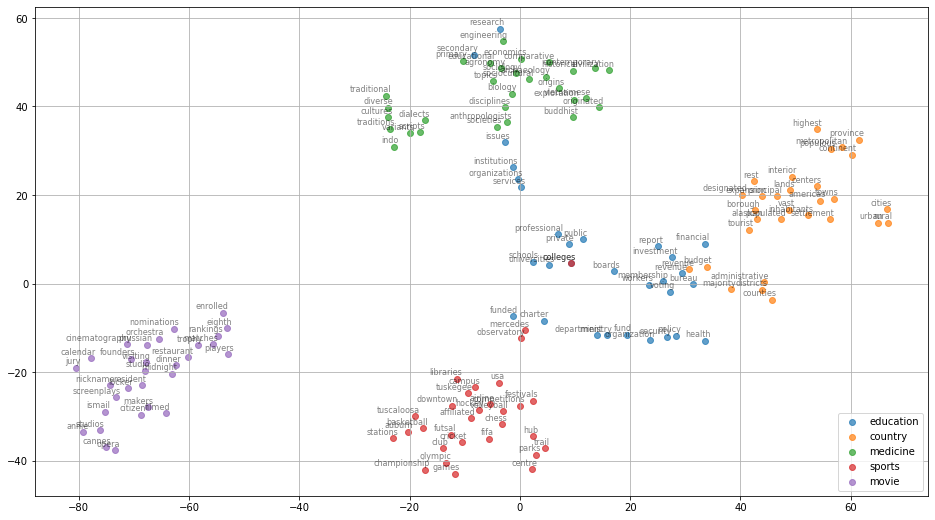

In [60]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(['education', 'country', 'medicine', 'sports', 'movie'], embeddings_en_2d, word_clusters)

## 4.2 CbOW
### 4.2.1 Set the variable *model* to the cbow word2vec model trained and saved in section 3 (*code*)

In [106]:
model = Word2Vec.load("word2vec.model_C")

### 4.2.2 Clean the model's vocabulary from stopwords using the nltk library (*code*)
**NB:** if you did not know how to do this part, set the variable *words_vocab_without_sw* to *list(model.wv.index_to_key )*  i.e.  <br>

```
words_vocab_without_sw = list(model.wv.index_to_key )
```

In [107]:
words_vocab = list(model.wv.index_to_key )
print("Size of Vocabulary before Stop Words removal:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:10])


words_vocab_without_sw = [w for w in words_vocab if not w in stopwords]
print("Size of Vocabulary after Stop Words removal:",len(words_vocab_without_sw))
print("Few words in Vocabulary",words_vocab_without_sw[:10])

Size of Vocabulary before Stop Words removal: 7830
Few words in Vocabulary ['the', 'of', 'and', 'in', 'to', 'is', 'as', 'for', 'by', 'that']
Size of Vocabulary after Stop Words removal: 7710
Few words in Vocabulary ['also', 'one', 'first', 'state', 'used', 'two', 'may', 'many', 'new', 'time']


### 4.2.3 Visualizing the words that are semantically close to ['education', 'country', 'medicine', 'sports', 'movie'] using the CBoW model (*run only*)

Embedding clusters: [-0.7047877  -0.3007123   0.586652    0.15707913 -0.67503417 -0.17966312
  1.1957355   0.6758542  -0.3278432  -0.16129601 -0.04333069 -0.20791483
 -0.16983369  0.3260564  -0.7378082   0.44332516  0.5019399  -0.0540542
 -0.89151716 -0.66504097  0.28469595 -0.0062105   0.32689428  0.00710037
  0.48596513  0.16139035  0.10126141  0.36471704 -0.70086575  0.01483424
  0.24329458 -0.51278484  0.81271386 -0.35397527 -0.34034663  0.41991937
  0.3533886   0.03781786 -0.4494504  -0.26723024  0.95245075 -0.17593767
 -0.16477135  0.17841405  0.5632701   0.04968518 -0.0147032  -0.32958102
 -0.11438028  0.8615718 ]
we have 5 clusters
Word in Cluster 1 of EDUCATION : ['public', 'foreign', 'exports', 'global', 'regions', 'indians', 'domestic', 'information', 'annual', 'japanese', 'owned', 'research', 'community', 'steel', 'relations', 'hundreds', 'consisting', 'khmer', 'diversity', 'production', 'markets', 'hub', 'interstate', 'airports', 'documents', 'fund', 'berber', 'officers', 

C:\Users\yin\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\yin\AppData\Roaming\Python\Python39\site-packages\sklearn\manifold\_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


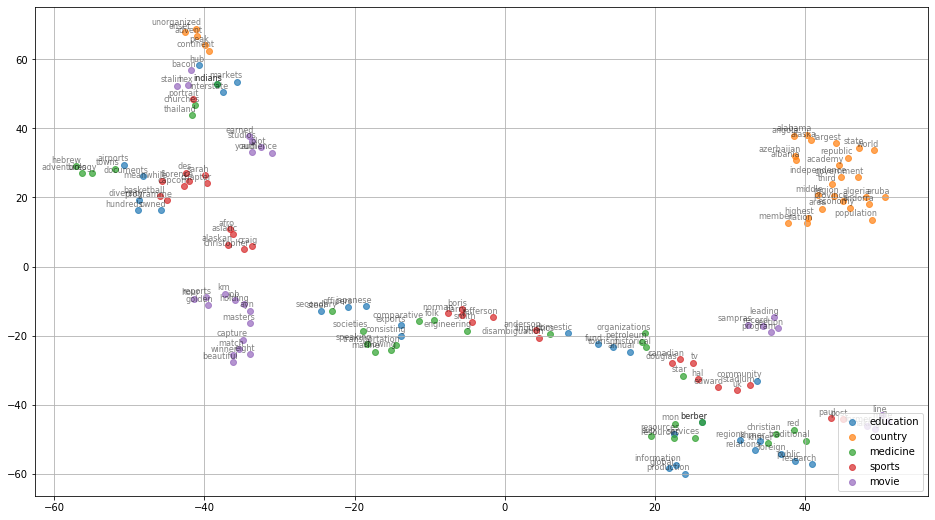

In [108]:
embeddings_en_2d, word_clusters = cluster_words(model, cluster_key_words = ['education', 'country', 'medicine', 'sports', 'movie'])
tsne_plot_similar_words(['education', 'country', 'medicine', 'sports', 'movie'], embeddings_en_2d, word_clusters)

## 4.3 Compare the two figures in section 4.1.3 and 4.2.3 and comment (*comment*)

From the figures, Skipgram model perform better than CBoW with a clearer plot.The words which are semantically close tend to cluster together in the first figure, while they are dispersed in the second one. It looks like the first figure is linearly separable, while the points in the second figure are more difficult to be seperated by linear funcitons. Also I noticed that in the first figure, the cluster of words that are semantically close to 'country' is near the 'education' one and far from 'movie' one which makes sense. CBoW works well on certain situation like the cluster of 'country', but in general CBoW has difficulty in clearly distinguishing the word semantically, and the vectors of different words are more similar. It might because CBoW is predicting center word by context,so for the word in the similar context, the vectors will be similar even though these words are not semantically similar. 